In [387]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [388]:

df = pd.read_csv('../data/snafu_sample.csv', dtype={'category':'category'})
idlist=df.id.rename('idlist').str.cat(df.listnum.astype(str))
df = df.assign(
    item=df['item']
     .str.replace('aligator', 'alligator')
     .str.replace('^a+rdva+rk', 'aardvark')
     .str.replace('baboob', 'baboon')
     .str.replace('antaloupe', 'antelope'),
    idlist=idlist
)
df=df.set_index([idlist, 'item'], drop=False)
df
# df.set_index(idlist, name='idlist')
# df.query('category=="animals"')['item'].sort_values().unique().tolist()

/tmp/ipykernel_15255/3195993138.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace('^a+rdva+rk', 'aardvark')


id  listnum category           item     rt  RTstart  \
idlist item                                                                   
A1010  strawberry     A101        0   fruits     strawberry  67072    67072   
       kiwi           A101        0   fruits           kiwi      0    67072   
       banana         A101        0   fruits         banana      0    67072   
       pineapple      A101        0   fruits      pineapple      0    67072   
       apple          A101        0   fruits          apple      0    67072   
...                    ...      ...      ...            ...    ...      ...   
C1508  chickenstrips  C150        8    foods  chickenstrips   6909   152000   
       cheeseburger   C150        8    foods   cheeseburger   4269   156269   
       meatloaf       C150        8    foods       meatloaf   6249   162518   
       jumbalaya      C150        8    foods      jumbalaya   5809   168327   
       sausage        C150        8    foods        sausage   9663   177990   

                            group idlist  
idlist item                               
A1010  strawberry     Experiment1  A1010  
       kiwi           Experiment1  A1010  
       banana         Experiment1  A1010  
       pineapple      Experiment1  A1010  
       apple          Experiment1  A1010  
...                           ...    ...  
C1508  chickenstrips  Experiment3  C1508  
       cheeseburger   Experiment3  C1508  
       meatloaf       Experiment3  C1508  
       jumbalaya      Experiment3  C1508  
       sausage        Experiment3  C1508  

[24572 rows x 8 columns]

In [468]:


# idlist=df.id.str.cat(df.listnum.astype(str))
# idlist
animals = (df
#  .assign(idlist=idlist)
#  [df.item.isin((df.item.value_counts()>20).index.tolist())]#index.tolist())]

#  [df.item.isin((df.item.value_counts().pipe(lambda s: s[s>20])).index.tolist())]
 .query('category=="foods"')#[['idlist','item']]
 .assign(animals=1.)['animals']
#  .set_index(['idlist','item'])
 .pipe(lambda df: df[~df.index.duplicated(keep='first')])
 .unstack().fillna(0.)#.drop_levels(0)
 .pipe(lambda df: df.loc[:,df.sum()>10])
)

X = animals.values
animals

item,bread,chicken,ham,fish,pork,lettuce,tomato,carrots,cucumber,onions,...,chili,donut,asparagus,cherries,kiwi,blueberries,strawberries,macaroni,candy,popcorn
idlist,,,,,,,,,,,,,,,,,,,,,
C1011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1016,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1021,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1023,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C1495,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1497,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1501,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4

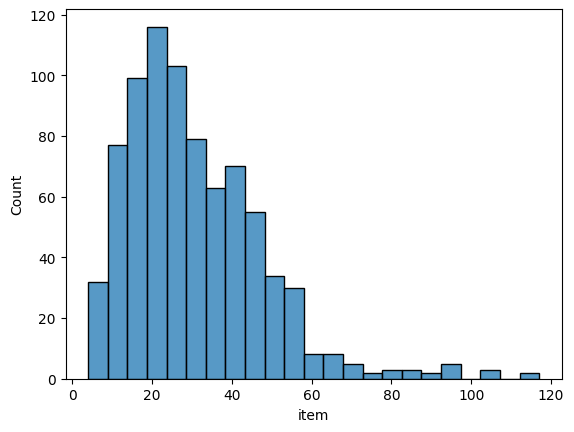

In [469]:
sns.histplot(df.groupby(level=0).item.count())
(df.groupby(level=0).item.count()).min()

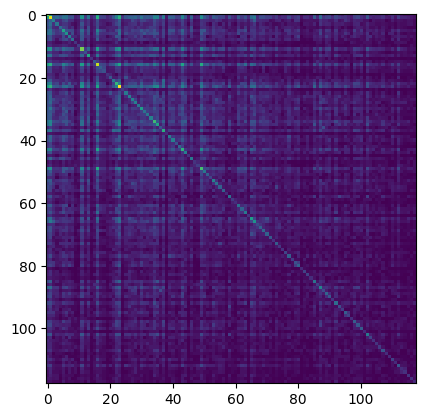

In [470]:
plt.imshow(animals.T@animals)

In [482]:
# sliding_window()
from numpy.lib.stride_tricks import as_strided, sliding_window_view
def arr_cooc(x, n=2):
    # print(x.strides)
    # return as_strided(x, shape=(x.shape[0], n), strides=x.strides*2)
    # print(x.shape)
    return sliding_window_view(x,min(n, x.shape[0]))
# as_strided(df.item.values, shape=(df.length,2), strides=
# (arr_cooc(df.item.values, 3))
# df.groupby(level=0)['item']
animal_occ = (df
#  [df.item.isin(df.item.value_counts(ascending=False).head(100).index.tolist())]
#  [df.item.isin((df.item.value_counts().pipe(lambda s: s[s>20])).index.tolist())]
 .query('category=="foods"')
 .item.astype('category')
)
dummies = np.eye(animal_occ.dtype.categories.shape[0])
roll_X=np.vstack([dummies[arr_cooc(g[1].values, n=5),:].max(axis=1) for g in animal_occ.cat.codes.groupby(level=0)])#[:,]
roll_X = roll_X[:,animal_occ[animal_occ.isin(animals.columns.tolist())].cat.codes.unique()]
# print(animal_occ.cat.codes.sort_values())
# print(animal_cooc.max(axis=0))
# animal_cooc.astype(int).sum(axis=1)
# roll_X=np.array([dummies[ix] for ix in animal_cooc.T])#.sum(axis=1)
# roll_X = roll_X.astype(bool).max(axis=0)
# animal_occ
# animal_occ.cat.codes
# np.eye(animal_occ.dtype.categories.shape[0])[animal_cooc[0]].shape
# animal_occ.cat.codes.unique()
# roll_animals=
# plt.spy(roll_X)
# dummies[arr_cooc(animal_occ.cat.codes.values, n=3)].max(axis=1)#.shape#.shape#max(axis=0)#.sum(axis=0)#.max(axis=0)
roll_X.shape
# animal_occ[animal_occ.isin(animals.columns.tolist())].cat.codes.values

(4744, 118)

In [483]:
ochiai(roll_X, pseudocts=0.5)

array([[1.        , 0.08196935, 0.03615737, ..., 0.01709062, 0.04325306,
        0.00416302],
       [0.08196935, 1.        , 0.18635491, ..., 0.0350734 , 0.00366819,
        0.00388374],
       [0.03615737, 0.18635491, 1.        , ..., 0.03155998, 0.02592397,
        0.02744239],
       ...,
       [0.01709062, 0.0350734 , 0.03155998, ..., 1.        , 0.00926412,
        0.009802  ],
       [0.04325306, 0.00366819, 0.02592397, ..., 0.00926412, 1.        ,
        0.07877897],
       [0.00416302, 0.00388374, 0.02744239, ..., 0.009802  , 0.07877897,
        1.        ]])

<Axes: ylabel='Density'>

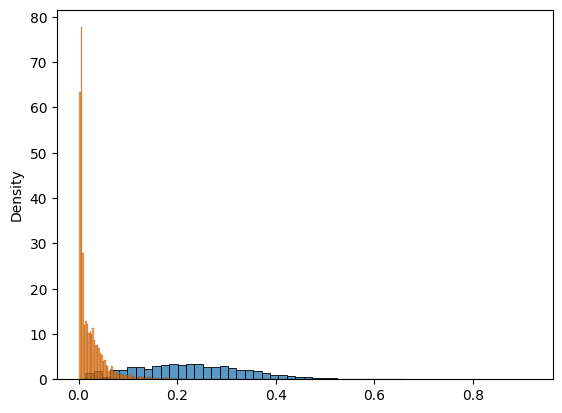

In [484]:
from affinis.associations import ochiai, resource_project, chow_liu, coocur_prob, mutual_information
from affinis.utils import _sq

sns.histplot(_sq(ochiai(X, pseudocts=0.5)), stat='density')
sns.histplot(_sq(ochiai(roll_X, pseudocts=0.5)), stat='density')
# sns.displot(_sq(resource_project(X)))

0.1309574436434137


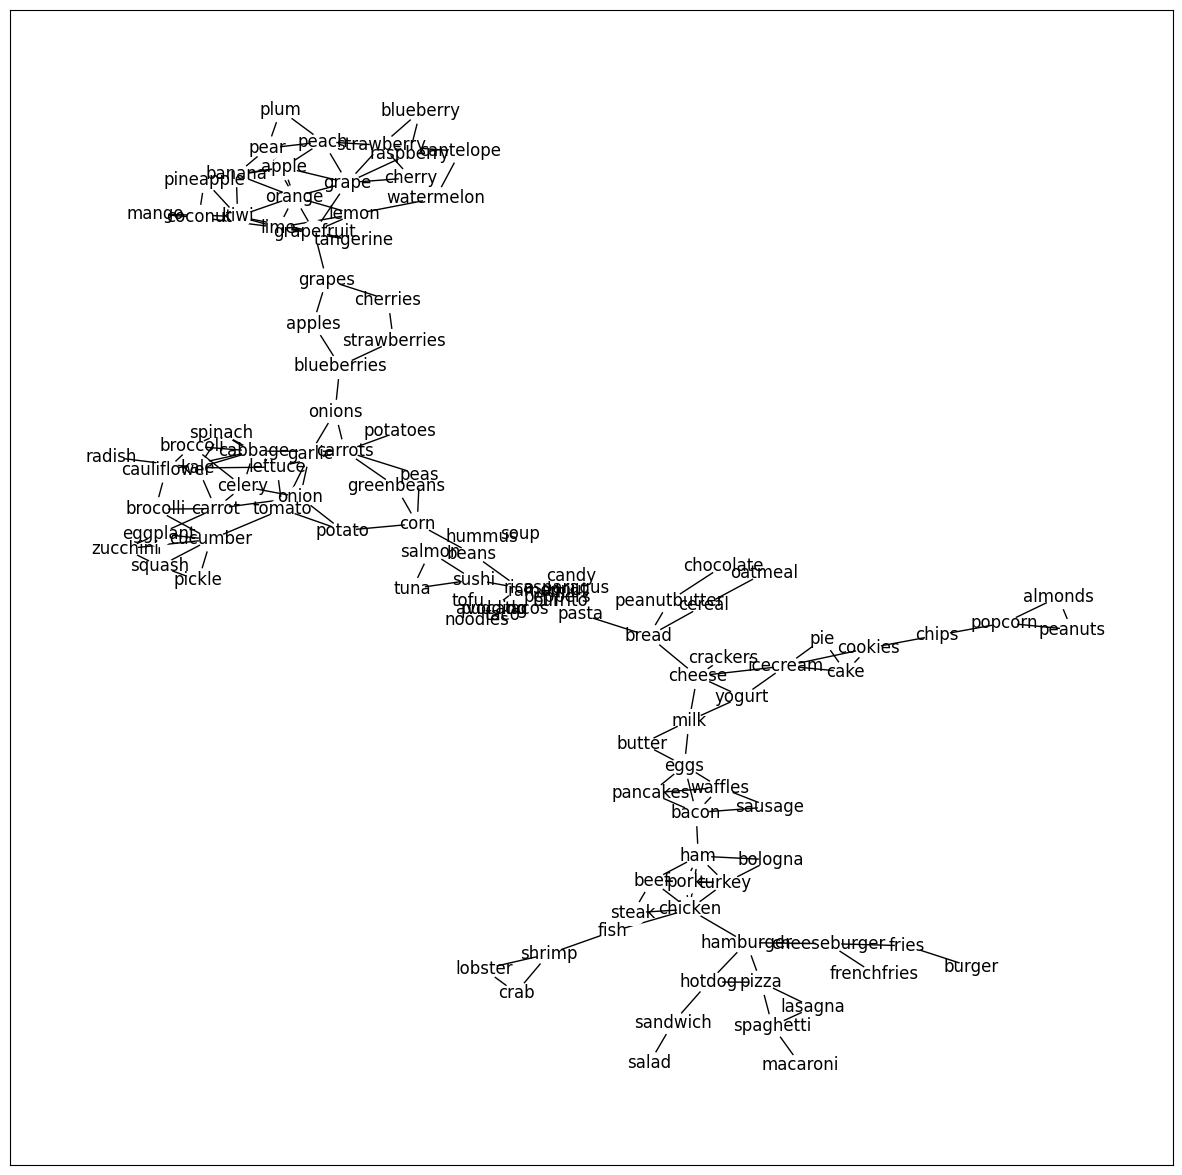

In [485]:
import networkx as nx

def top_tree_pct(x, mult=1):
    pct=np.percentile(_sq(x), 100-100*mult*2/x.shape[0])
    print(pct)
    return x>=pct
plt.figure(figsize=(15,15))
G = nx.from_pandas_adjacency(pd.DataFrame(_sq(_sq(top_tree_pct(ochiai(roll_X), mult=1.5))), index=animals.columns, columns=animals.columns))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos, node_color='w')

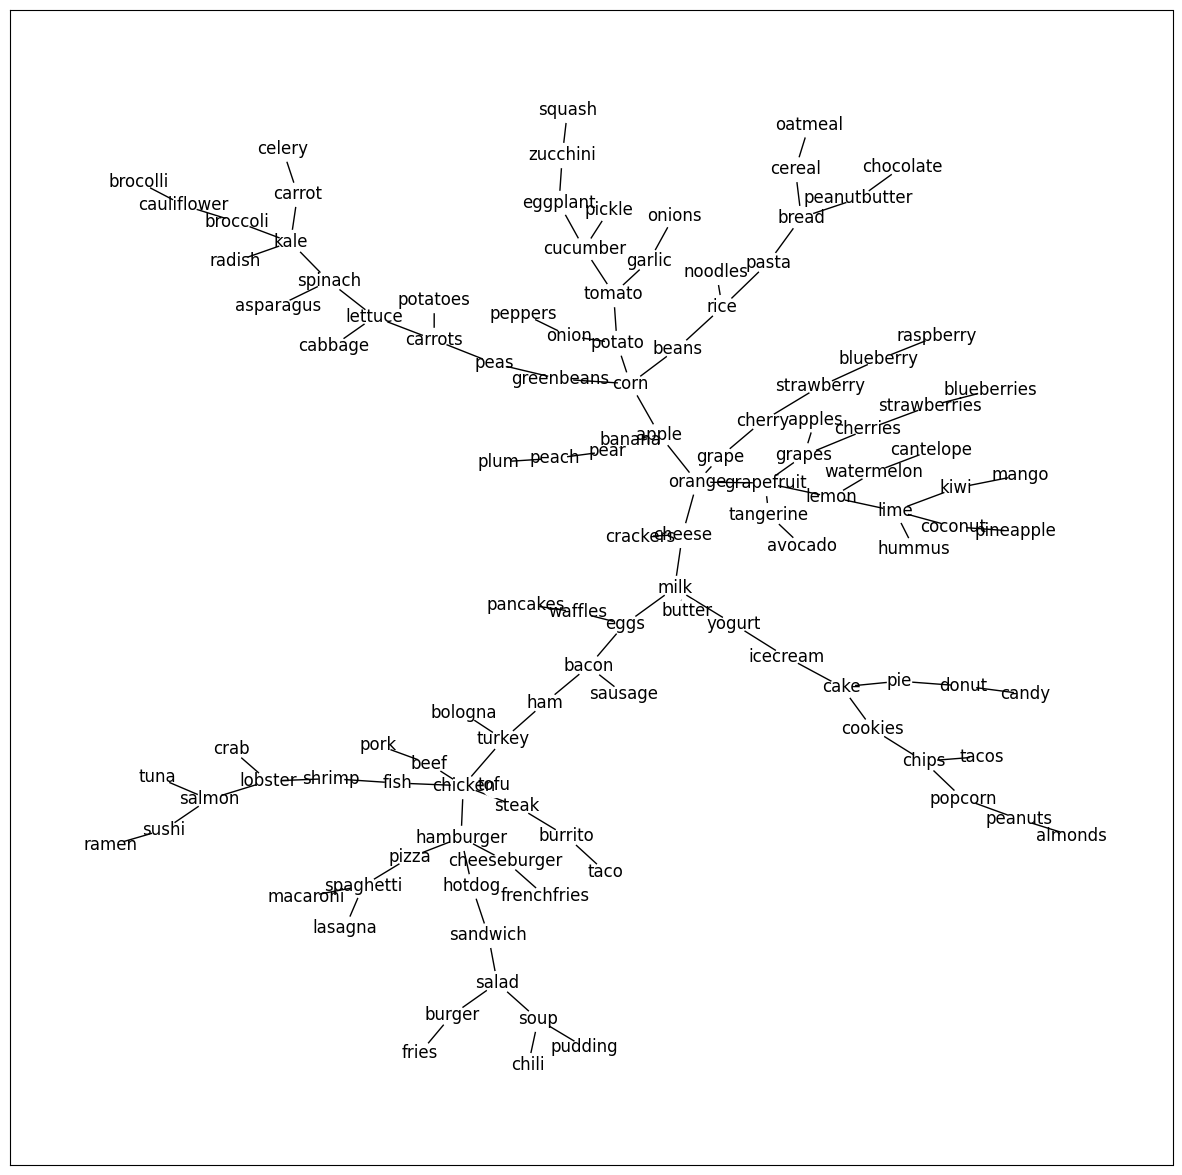

In [486]:
plt.figure(figsize=(15,15))
G = nx.from_pandas_adjacency(pd.DataFrame(chow_liu(roll_X, pseudocts=0.5), index=animals.columns, columns=animals.columns))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos, node_color='w')

In [538]:
import scipy.sparse as sprs
from affinis.distance import bilinear_dists
from affinis.proximity import sinkhorn, forest
from affinis.utils import _norm_diag

def get_mask(e_pmf,idx):
    return sprs.coo_array(_sq(e_pmf)*np.multiply.outer(idx,idx))

# est_dists = bilinear_dists(sinkhorn(_norm_diag(coocur_prob(roll_X, pseudocts=0.5))))
# est_dists = bilinear_dists(mutual_information(X, pseudocts=0.5))
est_dists = -np.log(ochiai(roll_X, pseudocts=0.5))

E_obs=sprs.coo_array([_sq(sprs.csgraph.minimum_spanning_tree(
        get_mask(_sq(est_dists),i)
    ).todense()>0) for i in animals.values
])

add_pmf = (E_obs.sum(axis=0)+0.5)/(E_obs.shape[0]+1)


mst_post = roll_X.shape[0]*(E_obs.sum(axis=0)+0.5)*_sq(coocur_prob(X, pseudocts=0.5))/(_sq(X.T@X)+1)

post_L=_sq((lambda o:o/(o+1))(_sq(mst_post)/forest(_norm_diag((lambda a: np.diag(a.sum(axis=0))-a)(_sq(mst_post))), beta=10)/roll_X.shape[0]))

<Axes: ylabel='Density'>

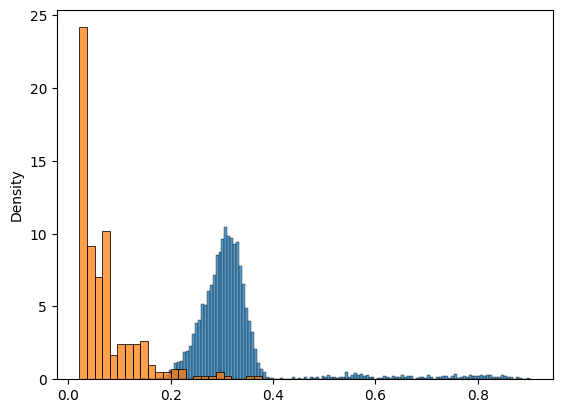

In [546]:
sns.histplot(np.where(post_L>0.1, post_L, np.nan), stat='density')
sns.histplot(np.where(mst_post>100, mst_post/roll_X.shape[0], np.nan), stat='density')
# _sq(mst_post).shape
# plt.xscale('log')

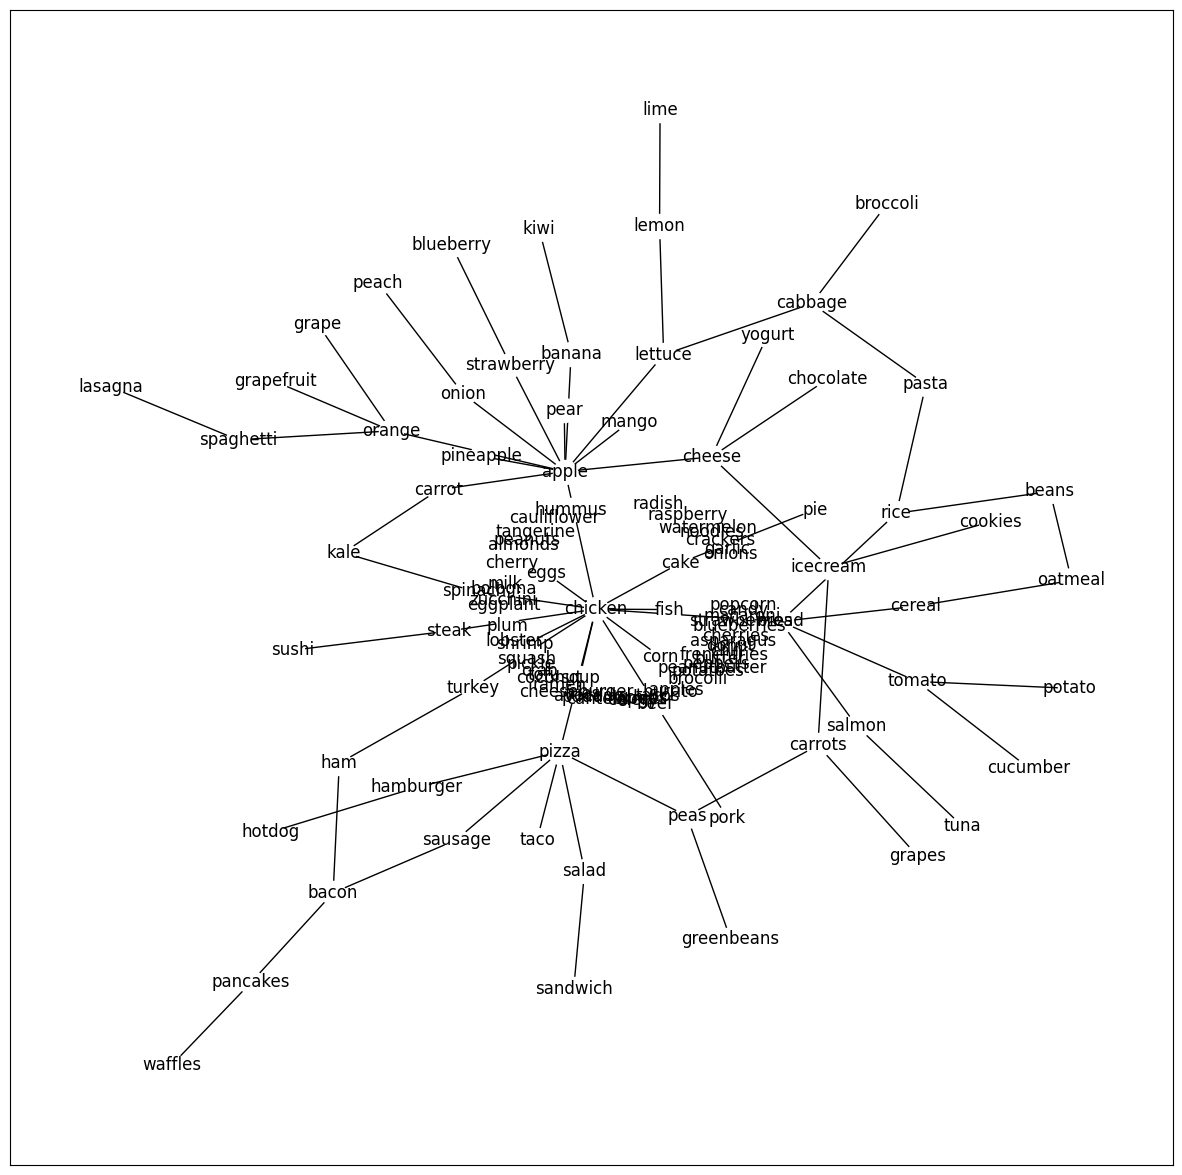

In [529]:
# sns.displot(mst_post)
# _sq(mst_post>0.1)
plt.figure(figsize=(15,15))
G = nx.from_pandas_adjacency(pd.DataFrame(_sq(mst_post>0.1).astype(int), index=animals.columns, columns=animals.columns))
# G = nx.from_pandas_adjacency(pd.DataFrame(_sq(_sq(top_tree_pct(_sq(post_L), mult=1.5))), index=animals.columns, columns=animals.columns))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos, node_color='w')
# nx.draw_networkx_edges(G, pos=pos, edge_cmap='viridis')

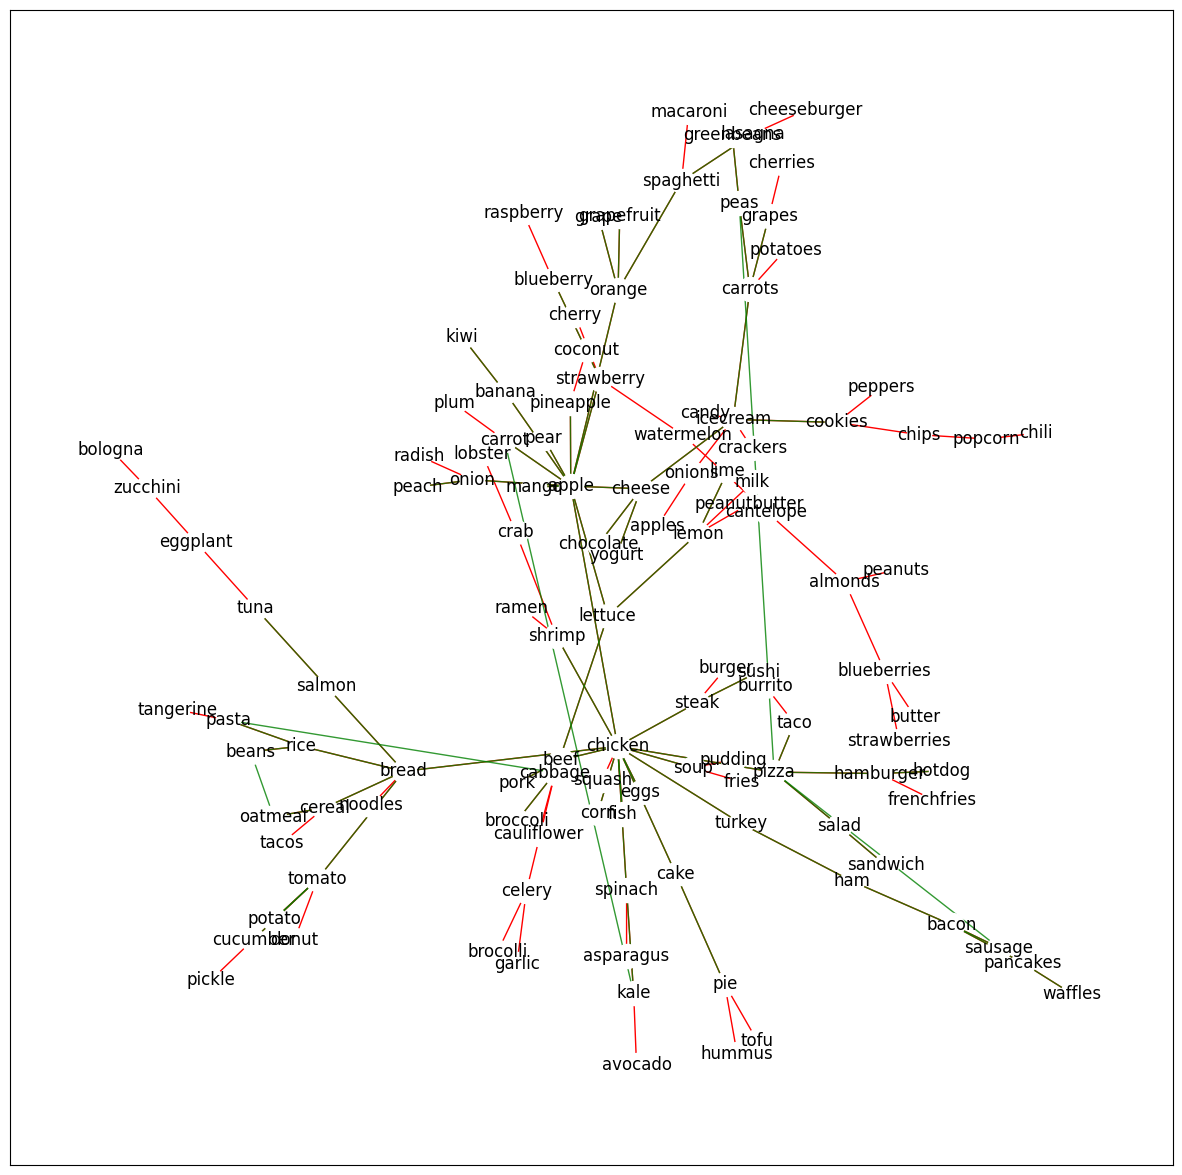

In [531]:
from scipy.sparse.csgraph import minimum_spanning_tree
plt.figure(figsize=(15,15))
Gtree = nx.from_pandas_adjacency(pd.DataFrame(minimum_spanning_tree(1-_sq(mst_post)).todense(), index=animals.columns, columns=animals.columns))
pos = nx.fruchterman_reingold_layout(Gtree)
nx.draw_networkx(Gtree, pos=pos, node_color='w', edge_color='r')
nx.draw_networkx_edges(G, pos=pos, edge_color='g', alpha=0.8)

In [ ]:
from toolz import sliding_window
# df.query('category=="animals"').groupby(['listnum','item'])['item'].rolling(2).count()
# animals.rolling(2).sum()
(df
 .reset_index(level=1, drop=True)
 .set_index(
    df
    .groupby(level=0)
    .cumcount()
    .rename('tokenid'), 
    append=True
    )['item']
#  .groupby(['item'])['item']
 .rolling(2)
 .apply(str.join(', '))
#  .count()
#  .rolling(2)
#  .count()
#  .unique()
)

TypeError: str.join() takes exactly one argument (0 given)

In [ ]:
ochiai(roll_X)

array([[1.        , 0.06821434, 0.0566472 , 0.03687511, 0.08216732,
        0.05568514, 0.04234324, 0.08763243, 0.05106187, 0.08526474,
        0.06886474, 0.02872981, 0.06410548, 0.16568483, 0.06650503],
       [0.06821434, 1.        , 0.03527703, 0.02806707, 0.4639385 ,
        0.03853101, 0.07383389, 0.06063676, 0.06235054, 0.06489829,
        0.0745835 , 0.04771063, 0.04815948, 0.02751472, 0.04769115],
       [0.0566472 , 0.03527703, 1.        , 0.15361907, 0.04107639,
        0.03479705, 0.05821165, 0.03650705, 0.06006216, 0.0414408 ,
        0.03367788, 0.17155044, 0.06485716, 0.0191141 , 0.02644618],
       [0.03687511, 0.02806707, 0.15361907, 1.        , 0.04074533,
        0.02013468, 0.01837261, 0.0443607 , 0.19223239, 0.03853762,
        0.02598279, 0.24931561, 0.0430473 , 0.03041507, 0.04918694],
       [0.08216732, 0.4639385 , 0.04107639, 0.04074533, 1.        ,
        0.05896583, 0.04561769, 0.05083569, 0.0423158 , 0.06280912,
        0.06203187, 0.04232686, 0.04047638, 